Notebook for running F/I simulation of multiple cells in parallel

Run for multiple seeds and plot the mean/std

In [1]:
is_colab = 'google.colab' in str(get_ipython())
if is_colab:
    !pip install neuron
    !git clone https://github.com/davidfague/Neural-Modeling.git -b cleanup
    %cd Neural-Modeling/scripts
    !pip install neuron_reduce
    !pip install ipympl

In [2]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

from Modules.simulation import Simulation
from Modules.cell_builder import SkeletonCell, CellBuilder
from Modules.constants import HayParameters

import os
from neuron import h

from logger import Logger # type: ignore

import numpy as np

--No graphics will be displayed.


In [3]:
%cd ../scripts

/home/drfrbc/Neural-Modeling/scripts


In [4]:
try:
    os.system("rm -r x86_64/")
except:
    pass

## Run cells

In [5]:
# plot FI with synapses and no mapping; 1000 synapses
import os
import numpy as np

sim_title = 'FI_testing_all_Basal_CI'#'FI_CISeedsNoSynapses'

# Define the template for common attributes
common_attributes = {
    'h_tstop': 5000,
    # 'save_every_ms':5000,
    'all_synapses_off': False,
    'CI_on': True,
    'h_i_duration': 4950,
    'h_i_delay': 50,
    'synapse_mapping': False,
    'exc_use_density': False,
    'inh_use_density': False,
    'exc_syn_number':int(1000 * (26100 / (26100 + 2650))), #26100,
    'inh_syn_number':int(1000 * (2650 / (26100 + 2650))),#2650
    'use_SA_probs': False
}
# Define the varying attributes for each sim_name, without including 'sim_name' key
varying_attributes = [
    # {'base_sim_name': 'Complex', 'disable_apic_37': False},
    # {'base_sim_name': 'ComplexWithCI', 'reduce_cell_selective': False, 'disable_apic_37':True},
    # {'base_sim_name': 'All', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True, 'disable_apic_37': False, 'reduce_soma_gpas':False},
    # {'base_sim_name': 'AllWithCI', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True, 'disable_apic_37':True, 'reduce_soma_gpas':False}
    
    {'base_sim_name': 'Complex'},
    {'base_sim_name': 'ComplexWith1BasalCI', 'num_basal_to_replace_with_CI':1},
    # {'base_sim_name': 'ComplexWith1TuftCI', 'num_tuft_to_replace_with_CI':1},
    {'base_sim_name': 'ComplexWithAllBasalCI', 'num_basal_to_replace_with_CI':8}
    # {'base_sim_name': 'ComplexWithAllTuftCI', 'num_tuft_to_replace_with_CI':2}
    # {'base_sim_name': 'All', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True, 'disable_basal_1st': False, 'reduce_soma_gpas':False},
    # {'base_sim_name': 'AllWithCI', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True, 'disable_basal_1st':True, 'reduce_soma_gpas':False}
    
    # {'base_sim_name': 'Complex', 'disable_basal_1st': False},
    # {'base_sim_name': 'ComplexWithCI', 'reduce_cell_selective': False, 'disable_basal_1st':True},
    # {'base_sim_name': 'Stylized', 'reduce_cell_selective': False, 'build_stylized':True},
    # {'base_sim_name': 'StylizedWithCI', 'reduce_cell_selective': False, 'build_stylized':True, 'disable_basal_1st': True}
    
    # {'base_sim_name': 'Basals', 'reduce_basals': True},
    # {'base_sim_name': 'Tufts', 'reduce_tufts': True},
    # {'base_sim_name': 'Obliques', 'reduce_obliques': True},
    # {'base_sim_name': 'All', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True}
]

numpy_random_states = [20, 400, 1000, 50000, 6000000]
neuron_random_states = None

# Generate the list of HayParameters with updated sim_names
all_parameters = []
if neuron_random_states is not None:
    for neuron_seed in neuron_random_states:
        for numpy_seed in numpy_random_states:
            for attributes in varying_attributes:
                for amp in np.arange(0, 2.1, 0.5):
                    sim_name = f"{attributes['base_sim_name']}_Np{numpy_seed}Neu{neuron_seed}_amp{round(amp, 1)}"
                    params = {
                        **common_attributes,
                        'neuron_random_state': neuron_seed,
                        'numpy_random_state': numpy_seed,
                        'h_i_amplitude': round(amp, 1),
                        'sim_name': sim_name,
                        **{k: v for k, v in attributes.items() if k != 'base_sim_name'}
                    }
                    all_parameters.append(HayParameters(**params))
else:
    for numpy_seed in numpy_random_states:
        for attributes in varying_attributes:
            for amp in np.arange(0, 2.1, 0.5):
                sim_name = f"{attributes['base_sim_name']}_Np{numpy_seed}_amp{round(amp, 1)}"
                params = {
                    **common_attributes,
                    'numpy_random_state': numpy_seed,
                    'h_i_amplitude': round(amp, 1),
                    'sim_name': sim_name,
                    **{k: v for k, v in attributes.items() if k != 'base_sim_name'}
                }
                all_parameters.append(HayParameters(**params))


# Initialize simulation
sim = Simulation(SkeletonCell.Hay, title=sim_title)

# Submit jobs to simulation
for parameters in all_parameters:
    sim.submit_job(parameters)

# Remove directory if it exists
try:
    os.system("rm -r x86_64/")
except:
    pass

# Run the simulation
sim.run()

(2024-06-03 12:48:44.832067)-[PID: 513920]–[INFO]: Total number of jobs: 75
(2024-06-03 12:48:44.832109)-[PID: 513920]–[INFO]: Total number of proccessors: 192
(2024-06-03 12:48:44.832272)-[PID: 513920]–[INFO]: Compiling modfiles.


rm: cannot remove 'x86_64/': No such file or directory


(2024-06-03 12:48:45.785945)-[PID: 514239]–[INFO]: Building SkeletonCell.Hay.(2024-06-03 12:48:45.786556)-[PID: 514240]–[INFO]: Building SkeletonCell.Hay.(2024-06-03 12:48:45.787374)-[PID: 514241]–[INFO]: Building SkeletonCell.Hay.

(2024-06-03 12:48:45.787937)-[PID: 514242]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.788549)-[PID: 514243]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.789199)-[PID: 514244]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.789757)-[PID: 514245]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.790436)-[PID: 514246]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.791063)-[PID: 514247]–[INFO]: Building SkeletonCell.Hay.

(2024-06-03 12:48:45.791733)-[PID: 514248]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.793012)-[PID: 514249]–[INFO]: Building SkeletonCell.Hay.
(2024-06-03 12:48:45.793964)-[PID: 514250]–[INFO]: Building SkeletonCell.Hay.(2024-06-03 12:48:45.794600)-[PID: 514251]–[INFO]: Building Skele

## Debugging

In [6]:
# debugging cell_model/stylized # can debug other cell models

# make NR cell
# all_parameters[0].reduce_apic = True
# all_parameters[0].reduce_basal = True
# # all_parameters[0].reduce_apic = True
# all_parameters[0].reduce_cell_selective = True
# cell_type = SkeletonCell.Hay

# build cell
# print(all_parameters[0])
# logger = Logger()
# cell_type = 'StylizedCell'
# cell_builder = CellBuilder(cell_type=cell_type, parameters=all_parameters[0], logger=logger)
# stylized_cell, _ = cell_builder.build_cell()#stylized_cell()
# print(stylized_cell)

# # build CellModel
# from Modules.cell_model import CellModel
# random_state = np.random.RandomState(cell_builder.parameters.numpy_random_state)
# np.random.seed(cell_builder.parameters.numpy_random_state)
# neuron_r = h.Random()
# neuron_r.MCellRan4(cell_builder.parameters.neuron_random_state)
# stylized_cellmodel = CellModel(stylized_cell, random_state, neuron_r, logger)

# # build hay cell
# haycell = cell_builder.build_Hay_cell()
# haycellmodel = CellModel(haycell, random_state, neuron_r, logger)
# print(haycellmodel.get_segments(['apic']))

# #debugging
# all_segments, seg_data = stylized_cellmodel.get_segments(['apic'])
# print(all_segments)
# all_segments, seg_data = haycellmodel.get_segments(['apic'])
# print(all_segments)

# print(stylized_cellmodel.all[-1].name().split(".")[-1].split("[")[0])
# # cell_builder.build_excitatory_synapses(cell)

# check NR nexus seg id
# segments, seg_data = stylized_cellmodel.get_segments(['all'])
# segments.index(stylized_cellmodel.apic[0](0.4))
# segments[271]
# list(stylized_cellmodel.apic[0])

# check stylized active conductances
# dir(stylized_cellmodel.all[0](0.5))

# sec_name = str(haycellmodel.all[0]).split(".")[-1] # name[idx]
# sec_name.split("[")[1].split("]")[0]

In [7]:
# check adj matrix
# segments, _ = stylized_cellmodel.get_segments(['all'])
# adj_matrix = np.zeros((len(segments), len(segments)))
# for i, seg in enumerate(segments):
#     idx = int(np.floor(seg.x * seg.sec.nseg))

#     # The segment is not the first one in the section => the parent is the previous segment
#     if idx != 0:
#         adj_matrix[i - 1, i] = 1
#         continue

#     # The segment is the first one in the section
#     pseg = seg.sec.parentseg()

#     # Soma, do nothing
#     if pseg is None: continue

#     # Not soma
#     pidx = int(np.floor(pseg.x * pseg.sec.nseg))
#     if pseg.x == 1: pidx -= 1
#     counter = 0
#     for j, pot_seg in enumerate(segments):
#         if str(pseg).split("(")[0] == str(pot_seg).split("(")[0]:
#             if counter == pidx: 
#                 pseg_id = j
#                 break
#             counter += 1

#     adj_matrix[pseg_id, i] = 1

# pseg.x == 1
# pidx
# seg.sec.parentseg()

# def extend_segments(segment, segments):
#     segments.extend(list(segment))
#     for child in segment.children():
#         extend_segments(child, segments)

# # Initialize the segments list
# segments = []

# # Start the recursion with the first section
# extend_segments(stylized_cellmodel.all[0], segments)



# def extend_sections(section, sections):
#     sections.append(section)
#     for child in section.children():
#         extend_sections(child, sections)

# # Initialize the segments list
# sections = []

# # Start the recursion with the first section
# extend_sections(stylized_cellmodel.all[0], sections)


# sections
# len(np.unique(sections))
# len(sections)
# len(segments)

# segs = []
# for sec in stylized_cellmodel.all:
#     segs.extend(list(sec))
# len(segs)

# [seg.sec.name() for seg in segments if seg not in segs]
# np.unique([str(seg.sec.name()).split('.')[-1].split('(')[0] for seg in segments if seg not in segs])
# np.unique(stylized_cellmodel.all)

# print(segments[0].sec.parentseg())

## Check Results

In [8]:
# Create directory for saving results
output_dir = f"../notebooks/{sim.title}"
os.makedirs(output_dir, exist_ok=True)

# Get all parameter paths
all_parameters_paths = [parameters.path for parameters in all_parameters]

# Plot results and save to the directory
plot_command = f"python3 plot_fi.py -d {sim.path} -s {output_dir}"
os.system(plot_command)

--No graphics will be displayed.


Figure(600x600)


0

## Testing New Analysis

In [9]:
# FOR DOING MULTIPLE SEEDS
import sys
sys.path.append("../")
sys.path.append("../Modules/")

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv
import analysis
from logger import Logger
from scipy.integrate import simps
from sklearn.metrics import mean_squared_error, r2_score

# Global constant to control Nexus plotting
USE_NEXUS_PLOTTING = False # not implemented. need to simulate nexus current injection and separate simulation folders based on whether nexus current inj
XLIM = (0,2)

def filter_spike_times(spike_times, start_time, end_time):
    return spike_times[(spike_times >= start_time) & (spike_times <= end_time)]

def analyze_and_log(soma_spikes, parameters):
    filtered_spike_times = filter_spike_times(soma_spikes, parameters.h_i_delay, parameters.h_i_delay + parameters.h_i_duration)
    firing_rate = len(filtered_spike_times) * 1000 / parameters.h_i_duration if len(filtered_spike_times) > 0 else 0
    return firing_rate

def collect_fi_data(sim_directories, base_name):
    amplitudes = []
    firing_rates = []
    for sim_directory in sim_directories:
        soma_spikes = analysis.DataReader.read_data(sim_directory, "soma_spikes")
        parameters = analysis.DataReader.load_parameters(sim_directory)
        amplitudes.append(parameters.h_i_amplitude)
        firing_rates.append(analyze_and_log(soma_spikes, parameters))
    return amplitudes, firing_rates

def calculate_area_under_curve(amplitudes, firing_rates):
    return simps(firing_rates, amplitudes)

def calculate_rmse_and_r2(amplitudes, firing_rates, reference_amplitudes, reference_firing_rates):
    # Interpolate reference firing rates to match the amplitudes of the current group
    reference_interpolation = np.interp(amplitudes, reference_amplitudes, reference_firing_rates)
    
    rmse = np.sqrt(mean_squared_error(firing_rates, reference_interpolation))
    r2 = r2_score(firing_rates, reference_interpolation)
    
    return rmse, r2

def calculate_statistics(data, reference_data):
    statistics = {}
    reference_area, reference_rmse, reference_r2 = reference_data

    for base_name, (area, rmse, r2) in data.items():
        percent_change_area = ((area - reference_area) / reference_area * 100) if reference_area != 0 else float('inf')
        percent_change_rmse = ((rmse - reference_rmse) / reference_rmse * 100) if reference_rmse != 0 else float('inf')
        percent_change_r2 = ((r2 - reference_r2) / reference_r2 * 100) if reference_r2 != 0 else float('inf')
        statistics[base_name] = (percent_change_area, percent_change_rmse, percent_change_r2)
    
    return statistics

def plot_all_fi_curves(grouped_data, save=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    statistics = {}
    
    print(f"grouped_data: {grouped_data}")

    # reference_amplitudes, reference_firing_rates = grouped_data.get("Complex", (None, None))
    # if reference_amplitudes is None or reference_firing_rates is None:
    #     raise ValueError("Reference group 'Complex' not found")

    # for base_name, data in grouped_data.items():
    #     amplitudes, firing_rates = data
    #     label = base_name
    #     ax.plot(amplitudes, firing_rates, label=label)

    #     if base_name != "Complex":
    #         rmse, r2 = calculate_rmse_and_r2(amplitudes, firing_rates, reference_amplitudes, reference_firing_rates)
    #         statistics[base_name] = (rmse, r2)

    ax.set_title("FI Curve")
    ax.set_xlabel('Current Injection (nA)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_xlim(XLIM)
    ax.legend()

    plt.tight_layout()
    plt.show()

    if save:
        if not os.path.exists(save_directory):
            os.makedirs(save_directory)
        fig.savefig(os.path.join(save_directory, "FI.png"), dpi=fig.dpi)
        with open(os.path.join(save_directory, 'comparative_statistics.csv'), mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Curve', 'RMSE', 'R2'])
            for base_name, (rmse, r2) in statistics.items():
                writer.writerow([base_name, rmse, r2])

def group_directories_by_prefix(directory_path):
    grouped_directories = {}
    for folder_name in os.listdir(directory_path):
        full_path = os.path.join(directory_path, folder_name)
        if os.path.isdir(full_path):
            parts = folder_name.split('_')
            if len(parts) > 2:  # case where basename_seed_ampINT
                celltype = parts[0]
                seed = parts[1]
                if celltype not in grouped_directories:
                    grouped_directories[celltype] = {}
                if seed not in grouped_directories[celltype]:
                    grouped_directories[celltype][seed] = []
                grouped_directories[celltype][seed].append(full_path)
            else:
                raise ValueError("Folder name format is incorrect, expected 'basename_seed_ampINT'")
    return grouped_directories


In [10]:
output_dir

'../notebooks/FI_testing_all_Basal_CI'

In [11]:
sim.path

'03-06-2024-12-48-44-FI_testing_all_Basal_CI'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error processing Complex: [Errno 2] No such file or directory: 'Np20/parameters.pickle'
Error processing ComplexWith1BasalCI: [Errno 2] No such file or directory: 'Np20/parameters.pickle'
Error processing ComplexWithAllBasalCI: [Errno 2] No such file or directory: 'Np20/parameters.pickle'
grouped_data: {}


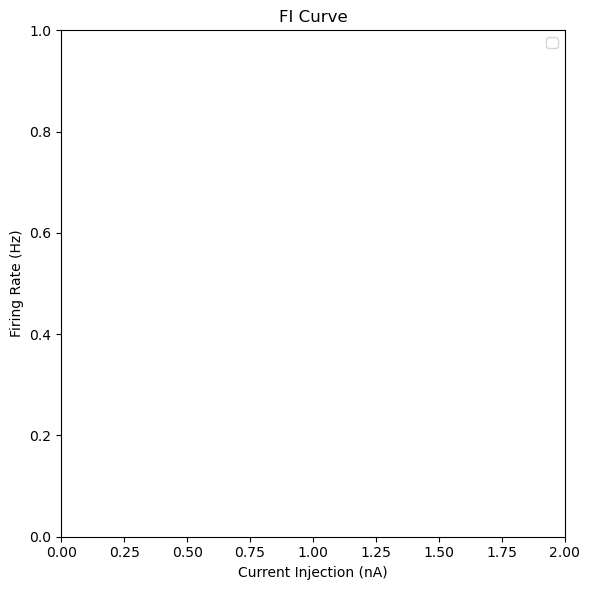

In [12]:

# sim_directory = sim.path

sim_directories = [sim.path]#,'FI_Seeds30000Syn-23-05-2024-17-40-25']

save = True
save_directory = output_dir

for sim_directory in sim_directories:

    grouped_directories = group_directories_by_prefix(sim_directory)
    all_data = {}
    for base_name, directories in grouped_directories.items():
        try:
            print("Collecting FI curves data for", base_name)
            amplitudes, firing_rates = collect_fi_data(directories, base_name)
            all_data[base_name] = (amplitudes, firing_rates)
        except Exception as e:
            print(f"Error processing {base_name}: {e}")

# plot_all_fi_curves(all_data, save)

In [13]:
# grouped_directories

In [14]:
# def collect_fi_data(sim_directories):
#     amplitudes = []
#     firing_rates = []
#     for sim_directory in sim_directories:
#         soma_spikes = analysis.DataReader.read_data(sim_directory, "soma_spikes")
#         parameters = analysis.DataReader.load_parameters(sim_directory)
#         amplitudes.append(parameters.h_i_amplitude)
#         firing_rates.append(analyze_and_log(soma_spikes, parameters))
#     return amplitudes, firing_rates

def collect_fi_data(sim_directories):
    seed_data = {}
    for seed, dirs in sim_directories.items():
        amplitudes = []
        firing_rates = []
        for sim_directory in dirs:
            soma_spikes = analysis.DataReader.read_data(sim_directory, "soma_spikes")
            parameters = analysis.DataReader.load_parameters(sim_directory)
            amplitudes.append(parameters.h_i_amplitude)
            firing_rates.append(analyze_and_log(soma_spikes, parameters))
        seed_data[seed] = (amplitudes, firing_rates)
    return seed_data

all_data = {}
for celltype, seeds in grouped_directories.items():
    seed_data = collect_fi_data(seeds)
    all_data[celltype] = seed_data

print(all_data)

# for base_name, dirs in grouped_directories.items():
#     amps, frs = collect_fi_data(dirs)
#     all_data[base_name] = (amplitudes, firing_rates)
# print(amps, frs)


{'Complex': {'Np20': ([0.0, 0.5, 1.0, 1.5, 2.0], [2.8282828282828283, 10.1010101010101, 13.737373737373737, 16.363636363636363, 18.585858585858585]), 'Np400': ([0.0, 0.5, 1.0, 1.5, 2.0], [3.0303030303030303, 9.8989898989899, 13.737373737373737, 16.565656565656564, 18.585858585858585]), 'Np1000': ([0.0, 0.5, 1.0, 1.5, 2.0], [2.4242424242424243, 10.303030303030303, 13.333333333333334, 15.95959595959596, 17.97979797979798]), 'Np50000': ([0.0, 0.5, 1.0, 1.5, 2.0], [4.444444444444445, 10.505050505050505, 13.93939393939394, 16.767676767676768, 18.98989898989899]), 'Np6000000': ([0.0, 0.5, 1.0, 1.5, 2.0], [3.6363636363636362, 10.1010101010101, 13.737373737373737, 16.565656565656564, 18.585858585858585])}, 'ComplexWith1BasalCI': {'Np20': ([0.0, 0.5, 1.0, 1.5, 2.0], [3.2323232323232323, 10.303030303030303, 14.343434343434344, 16.96969696969697, 19.393939393939394]), 'Np400': ([0.0, 0.5, 1.0, 1.5, 2.0], [3.2323232323232323, 10.303030303030303, 14.343434343434344, 17.171717171717173, 19.393939393

In [15]:
# plot_all_fi_curves(all_data)

In [16]:
def plot_all_fi_curves(grouped_data, save=False, save_directory=""):
    fig, ax = plt.subplots(figsize=(10, 8))
    statistics = {}
    
    # Define a color map for different cell types
    colors = plt.cm.get_cmap('tab20', len(grouped_data))
    seed_colors = {}
    seed_index = 0
    
    # Assign different base colors to different seeds
    for celltype, seeds_data in grouped_data.items():
        for seed in seeds_data:
            if seed not in seed_colors:
                seed_colors[seed] = colors(seed_index)
                seed_index += 1
    
    # Plot each cell type and seed with appropriate color shades
    for celltype, seeds_data in grouped_data.items():
        for seed, (amplitudes, firing_rates) in seeds_data.items():
            base_color = seed_colors[seed]
            if celltype == "Complex":
                shade = 0.5
            else:
                shade = 1.0
                
            label = f"{celltype}_{seed}"
            ax.plot(amplitudes, firing_rates, label=label, color=np.array(base_color) * shade, alpha = 0.6)

            if celltype != "Complex":
                reference_amplitudes, reference_firing_rates = grouped_data.get("Complex", {}).get(seed, (None, None))
                if reference_amplitudes is not None and reference_firing_rates is not None:
                    rmse, r2 = calculate_rmse_and_r2(amplitudes, firing_rates, reference_amplitudes, reference_firing_rates)
                    statistics[label] = (rmse, r2)

    ax.set_title("FI Curve")
    ax.set_xlabel('Current Injection (nA)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_xlim(XLIM)
    ax.legend()

    plt.tight_layout()
    plt.show()

    if save:
        if not os.path.exists(save_directory):
            os.makedirs(save_directory)
        fig.savefig(os.path.join(save_directory, "FI.png"), dpi=fig.dpi)
        with open(os.path.join(save_directory, 'comparative_statistics.csv'), mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Curve', 'RMSE', 'R2'])
            for base_name, (rmse, r2) in statistics.items():
                writer.writerow([base_name, rmse, r2])

In [17]:
def plot_mean_and_std(grouped_data, save=False, save_directory=""):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    celltype_data = {}

    # Collect data for each cell type
    for celltype, seeds_data in grouped_data.items():
        all_amplitudes = []
        all_firing_rates = []
        for seed, (amplitudes, firing_rates) in seeds_data.items():
            all_amplitudes.append(amplitudes)
            all_firing_rates.append(firing_rates)
        
        # Convert lists to numpy arrays for easier manipulation
        all_amplitudes = np.array(all_amplitudes)
        all_firing_rates = np.array(all_firing_rates)
        
        # Calculate mean and standard deviation
        mean_firing_rates = np.mean(all_firing_rates, axis=0)
        std_firing_rates = np.std(all_firing_rates, axis=0)
        
        celltype_data[celltype] = (all_amplitudes[0], mean_firing_rates, std_firing_rates)
    
    print(celltype_data)
    # Plot mean and standard deviation for each cell type
    for celltype, (amplitudes, mean_firing_rates, std_firing_rates) in celltype_data.items():
        ax.plot(amplitudes, mean_firing_rates, label=f"{celltype} Mean")
        ax.fill_between(amplitudes, mean_firing_rates - std_firing_rates, mean_firing_rates + std_firing_rates, alpha=0.3)
    
    ax.set_title("Mean FI Curve with Standard Deviation")
    ax.set_xlabel('Current Injection (nA)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_xlim(XLIM)
    ax.legend()

    plt.tight_layout()
    plt.show()

    if save:
        if not os.path.exists(save_directory):
            os.makedirs(save_directory)
        fig.savefig(os.path.join(save_directory, "Mean_FI.png"), dpi=fig.dpi)

In [18]:
all_data

{'Complex': {'Np20': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [2.8282828282828283,
    10.1010101010101,
    13.737373737373737,
    16.363636363636363,
    18.585858585858585]),
  'Np400': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [3.0303030303030303,
    9.8989898989899,
    13.737373737373737,
    16.565656565656564,
    18.585858585858585]),
  'Np1000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [2.4242424242424243,
    10.303030303030303,
    13.333333333333334,
    15.95959595959596,
    17.97979797979798]),
  'Np50000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [4.444444444444445,
    10.505050505050505,
    13.93939393939394,
    16.767676767676768,
    18.98989898989899]),
  'Np6000000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [3.6363636363636362,
    10.1010101010101,
    13.737373737373737,
    16.565656565656564,
    18.585858585858585])},
 'ComplexWith1BasalCI': {'Np20': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [3.2323232323232323,
    10.303030303030303,
    14.343434343434344,
    16.96969696969697,
    19.393939393939394]),
  'Np40

In [19]:
def sort_amplitudes_and_firing_rates(data):
    sorted_data = {}
    for celltype, seeds_data in data.items():
        sorted_seeds_data = {}
        for seed, (amplitudes, firing_rates) in seeds_data.items():
            sorted_indices = np.argsort(amplitudes)
            sorted_amplitudes = np.array(amplitudes)[sorted_indices]
            sorted_firing_rates = np.array(firing_rates)[sorted_indices]
            sorted_seeds_data[seed] = (sorted_amplitudes.tolist(), sorted_firing_rates.tolist())
        sorted_data[celltype] = sorted_seeds_data
    return sorted_data

In [20]:
data = sort_amplitudes_and_firing_rates(all_data)

In [21]:
data

{'Complex': {'Np20': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [2.8282828282828283,
    10.1010101010101,
    13.737373737373737,
    16.363636363636363,
    18.585858585858585]),
  'Np400': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [3.0303030303030303,
    9.8989898989899,
    13.737373737373737,
    16.565656565656564,
    18.585858585858585]),
  'Np1000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [2.4242424242424243,
    10.303030303030303,
    13.333333333333334,
    15.95959595959596,
    17.97979797979798]),
  'Np50000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [4.444444444444445,
    10.505050505050505,
    13.93939393939394,
    16.767676767676768,
    18.98989898989899]),
  'Np6000000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [3.6363636363636362,
    10.1010101010101,
    13.737373737373737,
    16.565656565656564,
    18.585858585858585])},
 'ComplexWith1BasalCI': {'Np20': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [3.2323232323232323,
    10.303030303030303,
    14.343434343434344,
    16.96969696969697,
    19.393939393939394]),
  'Np40

/tmp/ipykernel_513920/3690585112.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(grouped_data))


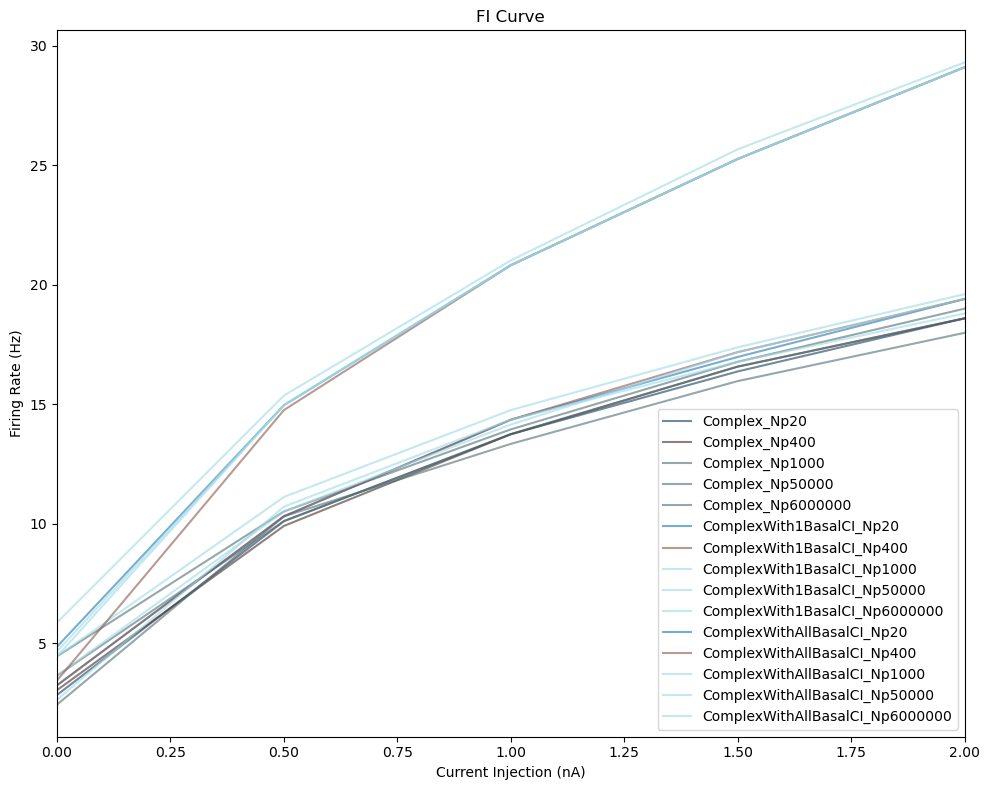

In [22]:
plot_all_fi_curves(data)

{'Complex': (array([0. , 0.5, 1. , 1.5, 2. ]), array([ 3.27272727, 10.18181818, 13.6969697 , 16.44444444, 18.54545455]), array([0.70446852, 0.20602099, 0.19793857, 0.27403353, 0.32323232])), 'ComplexWith1BasalCI': (array([0. , 0.5, 1. , 1.5, 2. ]), array([ 3.43434343, 10.58585859, 14.38383838, 17.09090909, 19.31313131]), array([0.59928877, 0.30235615, 0.19793857, 0.20602099, 0.27403353])), 'ComplexWithAllBasalCI': (array([0. , 0.5, 1. , 1.5, 2. ]), array([ 4.64646465, 14.98989899, 20.84848485, 25.33333333, 29.13131313]), array([0.77718723, 0.19793857, 0.08080808, 0.16161616, 0.08080808]))}


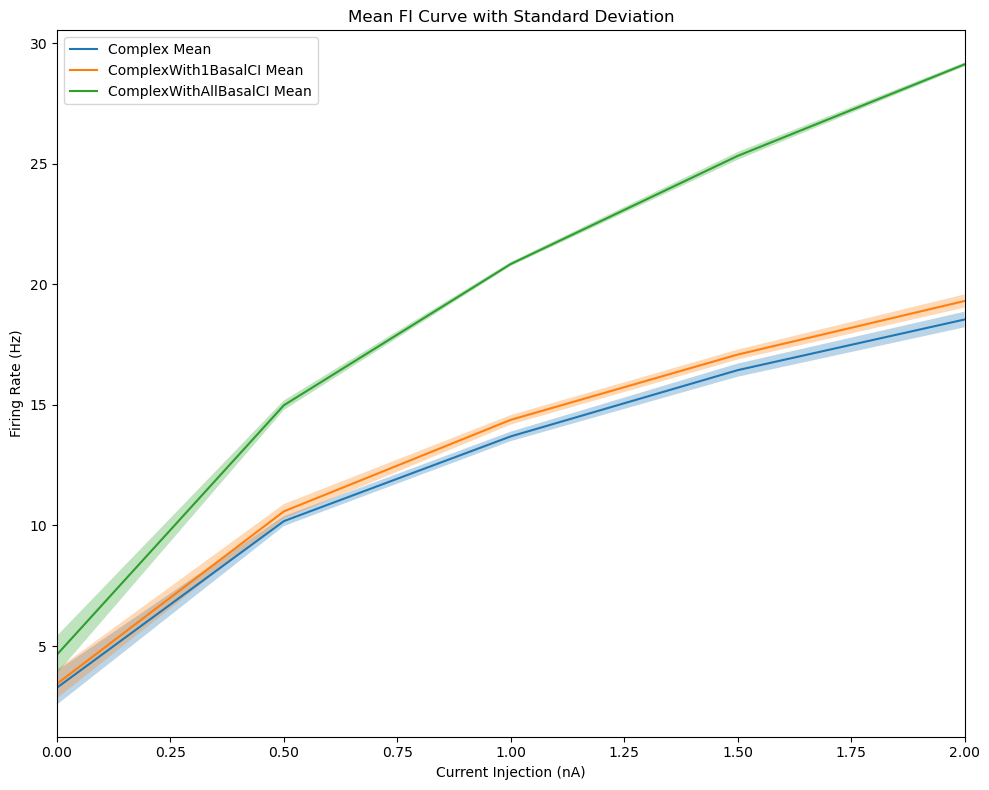

In [23]:
plot_mean_and_std(data)

In [24]:
# all_data = {}
# for celltype, seeds in grouped_directories.items():
#     amplitudes, firing_rates = collect_fi_data(seeds)
#     all_data[celltype] = (amplitudes, firing_rates)

# print(all_data)

In [25]:
def collect_fi_data(sim_directories):
    amplitudes = []
    firing_rates = []
    for sim_directory in sim_directories:
        soma_spikes = analysis.DataReader.read_data(sim_directory, "soma_spikes")
        parameters = analysis.DataReader.load_parameters(sim_directory)
        amplitudes.append(parameters.h_i_amplitude)
        firing_rates.append(analyze_and_log(soma_spikes, parameters))
    return amplitudes, firing_rates

In [26]:
# try to color code the same seeds
# def plot_all_fi_curves(grouped_data, save=False, save_directory=""):
#     fig, ax = plt.subplots(figsize=(10, 8))
#     statistics = {}
    
#     # Define a color map for different seeds
#     colors = plt.cm.get_cmap('tab20', len({seed for seeds_data in grouped_data.values() for seed in seeds_data}))
#     seed_colors = {}
#     seed_index = 0
    
#     # Assign different base colors to different seeds
#     for celltype, seeds_data in grouped_data.items():
#         for seed in seeds_data:
#             if seed not in seed_colors:
#                 seed_colors[seed] = colors(seed_index)
#                 seed_index += 1
    
#     # Plot each seed with slightly adjusted shades for different cell types
#     for celltype, seeds_data in grouped_data.items():
#         for seed, (amplitudes, firing_rates) in seeds_data.items():
#             base_color = np.array(seed_colors[seed])
#             if celltype == "Complex":
#                 adjusted_color = base_color * 0.8  # darker shade
#             else:
#                 adjusted_color = base_color * 1.2  # lighter shade
                
#             adjusted_color = np.clip(adjusted_color, 0, 1)  # Ensure the color values are within the valid range
            
#             label = f"{celltype}_{seed}"
#             ax.plot(amplitudes, firing_rates, label=label, color=adjusted_color, linestyle = '-')

#             if celltype != "Complex":
#                 reference_amplitudes, reference_firing_rates = grouped_data.get("Complex", {}).get(seed, (None, None))
#                 if reference_amplitudes is not None and reference_firing_rates is not None:
#                     rmse, r2 = calculate_rmse_and_r2(amplitudes, firing_rates, reference_amplitudes, reference_firing_rates)
#                     statistics[label] = (rmse, r2)

#     ax.set_title("FI Curve")
#     ax.set_xlabel('Current Injection (nA)')
#     ax.set_ylabel('Firing Rate (Hz)')
#     ax.set_xlim(XLIM)
#     ax.legend()

#     plt.tight_layout()
#     plt.show()

#     if save:
#         if not os.path.exists(save_directory):
#             os.makedirs(save_directory)
#         fig.savefig(os.path.join(save_directory, "FI.png"), dpi=fig.dpi)
#         with open(os.path.join(save_directory, 'comparative_statistics.csv'), mode='w', newline='') as file:
#             writer = csv.writer(file)
#             writer.writerow(['Curve', 'RMSE', 'R2'])
#             for base_name, (rmse, r2) in statistics.items():
#                 writer.writerow([base_name, rmse, r2])